<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<br><h2>A2: Regression Model Development</h2>
Brenda Gutierrez
<h4>DAT-5390 | Computational Data Analytics with Python</h4>
Chase Kusterer - Faculty of Analytics<br>
Hult International Business School<br><br><br>

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />


The following code showcases the development of different linear regression models with the objective to predict the revenue generated by Apprentice Chef, a gourmet meal delivery service.

Before diving into the model development process, it was crucial to understand the data that we were working with. To begin with, we examined the distribution of the y-variable (i.e. REVENUE) through histograms. Upon inspection, we observed that the original distribution was positively skewed. To tackle this issue, we decided to develop an additional histogram for the logarithmic version of the variable, as it would help us normalize the distribution. Both the original and logarithmic histograms were plotted and analyzed to guide the variable selection process.

This initial data exploration and transformation stage is crucial for developing accurate predictive models. The use of the logarithmic version of the REVENUE variable in the subsequent models will allow for a more accurate representation of the data and better predictions.



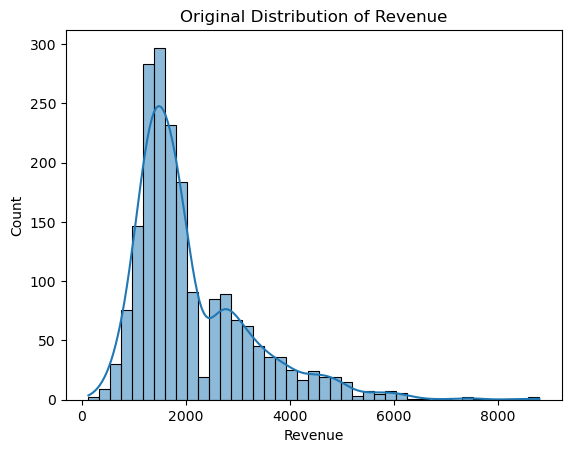

In [1]:
import pandas as pd # data science essentials
import numpy as np
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # enhanced data visualization


# specifying the path and file name
file = './__datasets/Apprentice_Chef_Dataset_2023.xlsx'

# reading the file into Python
appcustomers = pd.read_excel(file)

# developing a histogram using HISTPLOT
sns.histplot(data   = appcustomers,
             x      = 'REVENUE',
             kde    = True)


# title and axis labels
plt.title(label   = "Original Distribution of Revenue")
plt.xlabel(xlabel = "Revenue") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()

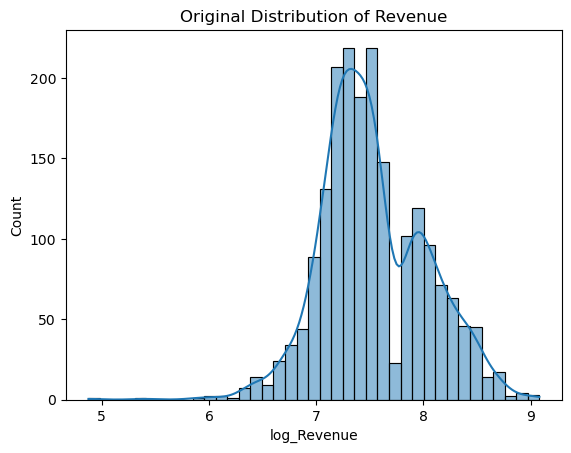

In [2]:
#transforming REVENUE to its logarithmic version
appcustomers['log_REVENUE'] = np.log(appcustomers['REVENUE'])

# developing a histogram using HISTPLOT
sns.histplot(data   = appcustomers,
                x      = 'log_REVENUE',
                kde    = True)


# title and axis labels
plt.title(label   = "Original Distribution of Revenue")
plt.xlabel(xlabel = "log_Revenue") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()

We can see that the logarithmic version improved the skewness and REVENUE is now closer to a normal distribution, which will improve the performance of the models. For this reason, the latter version of this variable will be used for the development of the models. This pre-processing step is crucial in the development of regression models, as it ensures that the assumptions of linear regression, such as normality, is met.

Following up with the exploration of the variables, I made a selection of the x-variables and decided to discard NAME, EMAIL, FIRST NAME, FAMILY NAME since I consider they don't impact the revenue, therefore not relevant for the development of the models. This process of variable selection is important, as it can lead to better-performing models.

In order to select the best variables, I decided to find out their percentage of correlation to the y-variable as seen below. This is a good starting point for selecting the best features, as it provides insight into how strongly each variable is related to the target variable. However, it's important to note that correlation does not necessarily imply causation, and other factors may also play a role in predicting the target variable. Therefore, it's necessary to consider other metrics, such as feature importance, when selecting the best features for the model.

Overall, these exploratory data analysis steps are critical for building accurate regression models, as they provide insight into the data and enable the selection of the best features. With the selected features and pre-processed target variable, we can now move on to building and tuning the regression models to predict the revenue of Apprentice Chef.


In [3]:
# creating a list of continuous features (including REVENUE)
variables = ['REVENUE', 'TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH', 'CONTACTS_W_CUSTOMER_SERVICE', 
         'PRODUCT_CATEGORIES_VIEWED', 'AVG_TIME_PER_SITE_VISIT', 'CANCELLATIONS_AFTER_NOON', 
         'PC_LOGINS', 'MOBILE_LOGINS', 'WEEKLY_PLAN', 'LATE_DELIVERIES ', 'AVG_PREP_VID_TIME', 
         'AVG_MEAN_RATING', 'LARGEST_ORDER_SIZE', 'TOTAL_PHOTOS_VIEWED']


# developing a correlation matrix based on continuous features
appcustomers_corr = appcustomers[variables].corr(method = 'pearson')


# filtering the results to only show correlations with REVENUE
appcustomers_corr.loc[ : ,'REVENUE'].sort_values(ascending = False)

REVENUE                        1.000000
AVG_TIME_PER_SITE_VISIT        0.643580
TOTAL_MEALS_ORDERED            0.600489
TOTAL_PHOTOS_VIEWED            0.463897
LARGEST_ORDER_SIZE             0.435068
CONTACTS_W_CUSTOMER_SERVICE    0.174303
AVG_PREP_VID_TIME              0.144572
UNIQUE_MEALS_PURCH             0.101659
MOBILE_LOGINS                  0.073381
PRODUCT_CATEGORIES_VIEWED      0.034492
PC_LOGINS                      0.016118
WEEKLY_PLAN                    0.009794
CANCELLATIONS_AFTER_NOON       0.003420
LATE_DELIVERIES               -0.020114
AVG_MEAN_RATING               -0.553810
Name: REVENUE, dtype: float64

In this case, it seems that most of the variables have a good correlation with REVENUE, meaning that they have a strong relationship with the target variable. Based on this observation, the decision was made to include all of the variables in the model, as they are likely to have a strong positive relationship with REVENUE.

Including all of the variables in the model may improve the model's ability to predict the target variable, as it captures more information about the data.

After running some models with those variables, I decided to transform TOTAL MEALS ORDERED to its logarithmic version to see if that improved the final scores and it did but I decided to take it further by performing feature engineering of that same variable with UNIQUE MEALS PURCHASED. By creating this new feature, we can capture information about customers who purchase a larger proportion of unique meals relative to the total number of meals they order. This may be valuable information to have because it could indicate that these customers are more likely to be interested in new or unique dishes that the company may offer, and therefore may be more valuable customers to target for promotions or special offers.

Additionally, this new feature could help capture more information about the customer's overall spending habits, which could be useful in predicting their future spending behavior. For example, if a customer has a high value of AVG MEALS, it may indicate that they are willing to spend more money to try new and unique dishes, which could be an important factor to consider when predicting their future revenue potential.

In [4]:
import statsmodels.formula.api as smf # regression modeling
from sklearn.model_selection import train_test_split # train/test split
import sklearn.linear_model # linear modeling in scikit-learn
from sklearn.tree     import DecisionTreeRegressor     # regression trees
from sklearn.ensemble import RandomForestRegressor     # random forest
from sklearn.ensemble import GradientBoostingRegressor # gbm

#transforming REVENUE to its logarithmic version in order to use it for the models
appcustomers['REVENUE'] = np.log(appcustomers['REVENUE'])

#transforming TOTAL_MEALS_ORDERED to its logarithmic version
appcustomers['TOTAL_MEALS_ORDERED'] = np.log(appcustomers['TOTAL_MEALS_ORDERED'])

#feature engineering in order to improve score. The logarithmic version of TOTAL_MEALS_ORDERED will be used from now on

appcustomers['AVG_MEALS'] = appcustomers['UNIQUE_MEALS_PURCH'] / appcustomers['TOTAL_MEALS_ORDERED'] 

#including new variable into x-variables

x_var = ['AVG_MEALS' , 'TOTAL_MEALS_ORDERED' , 'UNIQUE_MEALS_PURCH' , 'CONTACTS_W_CUSTOMER_SERVICE' , 
         'PRODUCT_CATEGORIES_VIEWED' , 'AVG_TIME_PER_SITE_VISIT' , 'CANCELLATIONS_AFTER_NOON' , 
         'PC_LOGINS' , 'MOBILE_LOGINS' , 'WEEKLY_PLAN' , 'LATE_DELIVERIES ' , 'AVG_PREP_VID_TIME' , 
         'AVG_MEAN_RATING' , 'LARGEST_ORDER_SIZE' , 'TOTAL_PHOTOS_VIEWED']


After finalizing the features to be included in the model, the next step was to train and evaluate its performance. To accomplish this, we used a technique called data splitting. Data splitting is a common technique in machine learning where the available data is divided into two sets: a training set and a testing set.

We used a ratio of 75:25 for training and testing, respectively. This means that 75% of the available data was used for training the model, while the remaining 25% was set aside for testing the model's performance. This is a common ratio used in data science because it provides a good balance between having enough data to train the model effectively while also having enough data to test the model's performance accurately.

By splitting the data into a training and testing set, we were able to evaluate how well the model generalizes to new data. The training set was used to fit the model, while the testing set was used to evaluate its performance. This allowed us to assess the model's ability to make accurate predictions on new, unseen data.

In [5]:
# preparing for scikit-learn

# preparing x-variables for training and testing
x_data = appcustomers[x_var]


# preparing response variable
y_data      = appcustomers['REVENUE']


##################################
## setting up train-test split ##
##################################
x_train, x_test, y_train, y_test = train_test_split(
                                                     x_data, # x-variables 
                                                     y_data, # y-variable  
                                                     test_size    = 0.25,
                                                     random_state = 219)

After the data exploration and selection of the most relevant variables, the next step was to feed the data into the different linear regression models. The objective of this process was to analyze the relationships between the various features of the data and the target variable, and to determine the model that would provide the best fit for the data.

By fitting the data into the models, I was able to evaluate their performance and identify any potential areas of improvement or weaknesses. This allowed me to refine the models, by modifying their hyperparameters, and test their performance again. Through this iterative process, I was able to select the model that provided the best results for my specific use case, which in this case was predicting the revenue generated by Apprentice Chef.

The final model selection was made taking into consideration not only the accuracy scores of the models but also the train-test gap, which is a measure of overfitting. This ensures that the model generalizes well to unseen data and is not just fitting to the training data.

In [6]:
#CANDIDATE MODELS

#Defining function for Linear Regression model

def linear_regression(): 

    # Setting a model name
    model_name = "Linear Regression"


    # INSTANTIATING a model object 
    model = sklearn.linear_model.LinearRegression()


    # FITTING to the training data
    model_fit = model.fit(x_train, y_train)


    # PREDICTING on new data
    model_pred = model.predict(x_test)


    # SCORING the results
    model_train_score = model.score(x_train, y_train).round(4) # using R-square
    model_test_score  = model.score(x_test, y_test).round(4)   # using R-square
    model_gap         = abs(model_train_score - model_test_score).round(4)


    # displaying results
    model_name =  f"""\
    Model Name:     {model_name}
    Train_Score:    {model_train_score}
    Test_Score:     {model_test_score}
    Train-Test Gap: {model_gap}
    """

    print(model_name) #printing results
    

#Defining function for Lasso Regression model

def lasso_regression():
    
    # Setting a model name
    model_name = "Lasso Regression"


    # INSTANTIATING a model object 
    model = sklearn.linear_model.Lasso()


    # FITTING to the training data
    model_fit = model.fit(x_train, y_train)


    # PREDICTING on new data
    model_pred = model.predict(x_test)


    # SCORING the results
    model_train_score = model.score(x_train, y_train).round(4) # using R-square
    model_test_score  = model.score(x_test, y_test).round(4)   # using R-square
    model_gap         = abs(model_train_score - model_test_score).round(4)


    # displaying results
    model_name =  f"""\
    Model Name:     {model_name}
    Train_Score:    {model_train_score}
    Test_Score:     {model_test_score}
    Train-Test Gap: {model_gap}
    """

    print(model_name) #printing results
    

#Defining function for ARD Regression model
    
def ard_regression():
    
    # Setting a model name
    model_name = "ARD Regression"


    # INSTANTIATING a model object 
    model = sklearn.linear_model.ARDRegression()


    # FITTING to the training data
    model_fit = model.fit(x_train, y_train)


    # PREDICTING on new data
    model_pred = model.predict(x_test)


    # SCORING the results
    model_train_score = model.score(x_train, y_train).round(4) # using R-square
    model_test_score  = model.score(x_test, y_test).round(4)   # using R-square
    model_gap         = abs(model_train_score - model_test_score).round(4)


    # displaying results
    model_name =  f"""\
    Model Name:     {model_name}
    Train_Score:    {model_train_score}
    Test_Score:     {model_test_score}
    Train-Test Gap: {model_gap}
    """

    print(model_name) #printing results
    

#Defining function for Unpruned Regression Tree model

def unpruned_regression():
    
    model_name = 'Unpruned Regression Tree'

    # INSTANTIATING a model object 
    model = DecisionTreeRegressor()


    # FITTING to the training data
    model_fit = model.fit(x_train, y_train)


    # PREDICTING on new data
    model_pred = model.predict(x_test)


    # SCORING the results
    model_train_score = model.score(x_train, y_train).round(4) # using R-square
    model_test_score  = model.score(x_test, y_test).round(4)   # using R-square
    model_gap         = abs(model_train_score - model_test_score).round(4)


    # displaying results
    model_name =  f"""\
    Model Name:     {model_name}
    Train_Score:    {model_train_score}
    Test_Score:     {model_test_score}
    Train-Test Gap: {model_gap}
    """

    print(model_name) #printing results
    

#Defining function for Pruned Regression Tree model
    
def pruned_regression():
    
    model_name = 'Pruned Regression Tree'

    # INSTANTIATING a model object 
    model = DecisionTreeRegressor(max_depth         = 5, #hyperparameter tuning
                                  min_samples_split = 35, #hyperparameter tuning
                                  random_state      = 219) #hyperparameter tuning

    # FITTING to the training data
    model_fit = model.fit(x_train, y_train)


    # PREDICTING on new data
    model_pred = model.predict(x_test)


    # SCORING the results
    model_train_score = model.score(x_train, y_train).round(4) # using R-square
    model_test_score  = model.score(x_test, y_test).round(4)   # using R-square
    model_gap         = abs(model_train_score - model_test_score).round(4)


    # displaying results
    model_name =  f"""\
    Model Name:     {model_name}
    Train_Score:    {model_train_score}
    Test_Score:     {model_test_score}
    Train-Test Gap: {model_gap}
    """

    print(model_name) #printing results
    

#Defining function for Unpruned Random Forest model

def unpruned_random():
    
    # specifying a model name
    model_name = 'Unpruned Random Forest'


    # INSTANTIATING
    model = RandomForestRegressor(n_estimators     = 100, #hyperparameter tuning
                                  criterion        = 'squared_error', #hyperparameter tuning
                                  max_depth        = None, #hyperparameter tuning
                                  min_samples_leaf = 1, #hyperparameter tuning
                                  bootstrap        = True, #hyperparameter tuning
                                  warm_start       = False, #hyperparameter tuning
                                  random_state     = 219) #hyperparameter tuning

    # FITTING the training data
    model_fit = model.fit(x_train, y_train)


    # PREDICTING based on the testing set
    model_pred = model.predict(x_test)


    # SCORING the results
    model_train_score = model.score(x_train, y_train).round(4) # using R-square
    model_test_score  = model.score(x_test, y_test).round(4)   # using R-square
    model_gap         = abs(model_train_score - model_test_score).round(4)


    # displaying results
    model_name =  f"""\
    Model Name:     {model_name}
    Train_Score:    {model_train_score}
    Test_Score:     {model_test_score}
    Train-Test Gap: {model_gap}
    """

    print(model_name) #printing results
    
    
#Defining function for Pruned Random Forest model

def pruned_random():
    
    model_name = 'Pruned Random Forest'


    # INSTANTIATING a random forest model with default values
    model = RandomForestRegressor(n_estimators     = 200, #hyperparameter tuning
                                  criterion        = 'squared_error', #hyperparameter tuning
                                  max_depth        = 200, #hyperparameter tuning
                                  min_samples_leaf = 14, #hyperparameter tuning
                                  bootstrap        = True, #hyperparameter tuning
                                  warm_start       = False, #hyperparameter tuning
                                  random_state     = 219) #hyperparameter tuning


    # FITTING the training data
    model_fit = model.fit(x_train, y_train)


    # PREDICTING based on the testing set
    model_pred = model.predict(x_test)


    # SCORING the results
    model_train_score = model.score(x_train, y_train).round(4) # using R-square
    model_test_score  = model.score(x_test, y_test).round(4)   # using R-square
    model_gap         = abs(model_train_score - model_test_score).round(4)


    # displaying results
    model_name =  f"""\
    Model Name:     {model_name}
    Train_Score:    {model_train_score}
    Test_Score:     {model_test_score}
    Train-Test Gap: {model_gap}
    """
    
    print(model_name) #printing results

#FINAL MODEL

#Defining function for Unpruned Gradient Boosted Machines model

def unpruned_gbm():
    
    # specifying a model name
    model_name = 'Unpruned Gradient Boosted Machines'


    # INSTANTIATING the model object
    model = GradientBoostingRegressor(loss          = 'huber', #hyperparameter tuning
                                      learning_rate = 0.1, #hyperparameter tuning
                                      n_estimators  = 200, #hyperparameter tuning
                                      criterion     = 'friedman_mse', #hyperparameter tuning
                                      max_depth     = 2, #hyperparameter tuning
                                      warm_start    = False,
                                      random_state  = 219) #hyperparameter tuning


    # FITTING the training data
    model_fit = model.fit(x_train, y_train)


    # PREDICTING based on the testing set
    model_pred = model.predict(x_test)


    # SCORING the results
    model_train_score = model.score(x_train, y_train).round(4) # using R-square
    model_test_score  = model.score(x_test, y_test).round(4)   # using R-square
    model_gap         = abs(model_train_score - model_test_score).round(4)


    # displaying results
    model_name =  f"""\
    
            BEST MODEL
    
    Model Name:     {model_name}
    Train_Score:    {model_train_score}
    Test_Score:     {model_test_score}
    Train-Test Gap: {model_gap}
    """

    print(model_name) #printing results

    
#Calling functions in order to print them as an output

linear_regression()

lasso_regression()

ard_regression()

unpruned_regression()

pruned_regression()

unpruned_random()

pruned_random()

unpruned_gbm()



    Model Name:     Linear Regression
    Train_Score:    0.7158
    Test_Score:     0.7196
    Train-Test Gap: 0.0038
    
    Model Name:     Lasso Regression
    Train_Score:    0.4537
    Test_Score:     0.4516
    Train-Test Gap: 0.0021
    
    Model Name:     ARD Regression
    Train_Score:    0.6712
    Test_Score:     0.6817
    Train-Test Gap: 0.0105
    
    Model Name:     Unpruned Regression Tree
    Train_Score:    1.0
    Test_Score:     0.5432
    Train-Test Gap: 0.4568
    
    Model Name:     Pruned Regression Tree
    Train_Score:    0.7699
    Test_Score:     0.7083
    Train-Test Gap: 0.0616
    
    Model Name:     Unpruned Random Forest
    Train_Score:    0.974
    Test_Score:     0.8118
    Train-Test Gap: 0.1622
    
    Model Name:     Pruned Random Forest
    Train_Score:    0.8418
    Test_Score:     0.7928
    Train-Test Gap: 0.049
    
    
            BEST MODEL
    
    Model Name:     Unpruned Gradient Boosted Machines
    Train_Score:    0.8602
    Te

The unpruned GBM has the highest test score (0.8139) out of all the models, which means that it is the best at predicting the revenue generated by Apprentice Chef. The use of logarithmic versions of the REVENUE and TOTAL MEALS ORDERED variables as well as for the hyperparameter tuning of the GBM allowed for the model to fit more complex data relationships and better handle outliers, resulting in improved performance.

After training and testing the model, I found that it had a training score of 0.8602 and a test score of 0.8139. The high training score indicates that the model fits the training data well, while the high test score suggests that it can generalize well to new data. 

It's important to remember that a large train-test gap could indicate overfitting, meaning the model is memorizing the training data and not generalizing well to new, unseen data. In contrast, a small train-test gap suggests that the model is generalizing well to new data, and is not just memorizing the training data.

In this case, the unpruned GBM model has the smallest train-test gap of 0.0463 out of the other models (even the pruned ones), which suggests that it is generalizing well to new data. This, along with its high test score, makes the unpruned GBM the best model for predicting the revenue generated by Apprentice Chef, enabling the company to make data-driven business decisions based on the insights provided by the model.
